## 리뷰 데이터를 통한 상품 추천 여부 예측

Kaggle에서 제공하는 [`Womens Clothing E-Commerce Reviews`](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews)의 리뷰 데이터를 바탕으로 상품 추천 여부를 예측하는 분류 모델을 만들고, 이를 새로운 상품의 리뷰를 받았을 때 해당 상품을 추천하는 지 예측할 수 있다.

---

In [ ]:
!pip install wordcloud

## 1. 데이터 읽기

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Womens Clothing E-Commerce Reviews(수정).csv 데이터 불러오기
df_origin = pd.read_csv("./data/Womens Clothing E-Commerce Reviews(수정).csv")

In [6]:
df_origin.head()

,Unnamed: 0,Unnamed: 0.1,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,0,0,Initmates,Intimate,Intimates
1,1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,0,4,General,Dresses,Dresses
2,2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,1,0,General,Dresses,Dresses
3,3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,0,General Petite,Bottoms,Pants
4,4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,0,6,General,Tops,Blouses


- 'Recommended IND': 0 : 추천한다, 1 : 추천하지않는다

In [5]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Unnamed: 0.1             23486 non-null  int64 
 2   Clothing ID              23486 non-null  int64 
 3   Age                      23486 non-null  int64 
 4   Title                    19676 non-null  object
 5   Review Text              22641 non-null  object
 6   Rating                   23486 non-null  int64 
 7   Recommended IND          23486 non-null  int64 
 8   Positive Feedback Count  23486 non-null  int64 
 9   Division Name            23472 non-null  object
 10  Department Name          23472 non-null  object
 11  Class Name               23472 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.2+ MB


In [7]:
df_origin.describe()

,Unnamed: 0,Unnamed: 0.1,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,11742.500000,918.118709,43.198544,4.196032,0.177638,2.535936
std,6779.968547,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,5871.250000,861.000000,34.000000,4.000000,0.000000,0.000000
50%,11742.500000,11742.500000,936.000000,41.000000,5.000000,0.000000,1.000000
75%,17613.750000,17613.750000,1078.000000,52.000000,5.000000,0.000000,3.000000
max,23485.000000,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


## 2. 데이터 정제

In [8]:
# 의미 없는 변수인 'Unnamed: 0, Unnamed: 0.1' 삭제 
df_clean = df_origin.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [9]:
df_clean.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,0,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,0,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,1,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,0,6,General,Tops,Blouses


In [51]:
df_clean.shape

(19675, 10)

### 2.1. 결측값 확인

In [10]:
df_clean.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [11]:
df_clean[df_clean['Division Name'].isnull()]
# Division Name, Department Name, Class Name 모두 결측값 지님

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,0,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,0,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,0,0,NaN,NaN,NaN
13787,492,48,NaN,NaN,5,0,0,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,0,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,0,0,NaN,NaN,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,0,0,NaN,NaN,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,0,5,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,0,0,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,0,0,NaN,NaN,NaN


### 2.2. 결측값 처리

입력 데이터로 들어갈 `Review Text`와 `Title`의 결측값 처리

In [135]:
df_clean = df_clean[~df_clean['Review Text'].isnull()]
df_clean.reset_index(drop=True, inplace=True)

In [50]:
# 'Review Text' 결측값 처리 확인
df_clean.isnull().sum()

Clothing ID                 0
Age                         0
Title                       0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              13
Department Name            13
Class Name                 13
dtype: int64

## 3. 데이터 시각화

### 3.1. `Title` word cloud

In [52]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

In [53]:
# 'Title'의 결측값 제거
df_clean_title = df_clean[~df_clean['Title'].isnull()]

# 정규표현식 re의 findall 함수: 띄어 쓰기 단위로 글자만 가져옴 (소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_clean_title['Title'].str.lower().str.cat(sep=' '))

In [54]:
tokens[:20]

['some',
 'major',
 'design',
 'flaws',
 'my',
 'favorite',
 'buy',
 'flattering',
 'shirt',
 'not',
 'for',
 'the',
 'very',
 'petite',
 'cagrcoal',
 'shimmer',
 'fun',
 'shimmer',
 'surprisingly',
 'goes']

In [55]:
# 불용어 다운로드
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
en_stops = set(stopwords.words('english'))

# 'stopwords'에 해당되지 않는 단어 저장
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence[:20]

['major',
 'design',
 'flaws',
 'favorite',
 'buy',
 'flattering',
 'shirt',
 'petite',
 'cagrcoal',
 'shimmer',
 'fun',
 'shimmer',
 'surprisingly',
 'goes',
 'lots',
 'flattering',
 'fun',
 'dress',
 'dress',
 'looks']

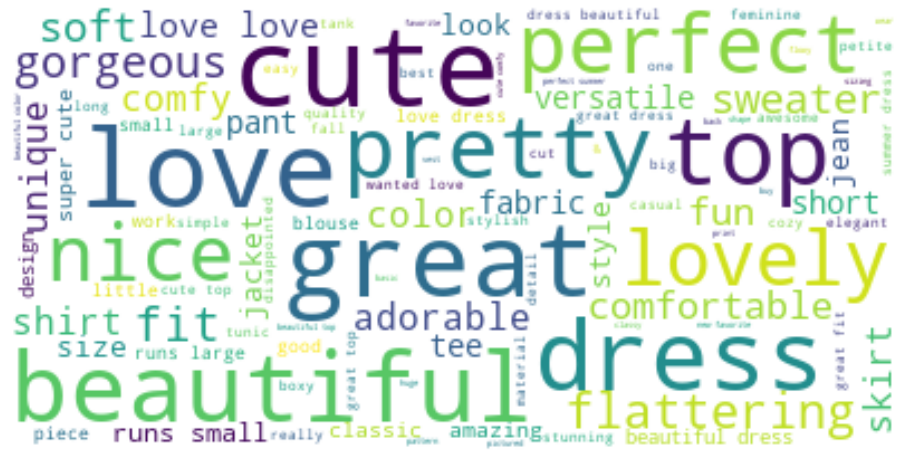

In [57]:
# Word Cloud 

# 출력 사이즈 설정
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud 저장
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(filtered_sentence))

# wordcloud 출력
plt.imshow(wordcloud, interpolation="bilinear") # 이미지 픽셀 출력: 부드럽게
plt.axis("off")
plt.show()

### 3.2. `Review Text` word cloud

In [58]:
tokens = re.findall("[\w']+", df_clean['Review Text'].str.lower().str.cat(sep=' ')) 

filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence[:20]

['high',
 'hopes',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered']

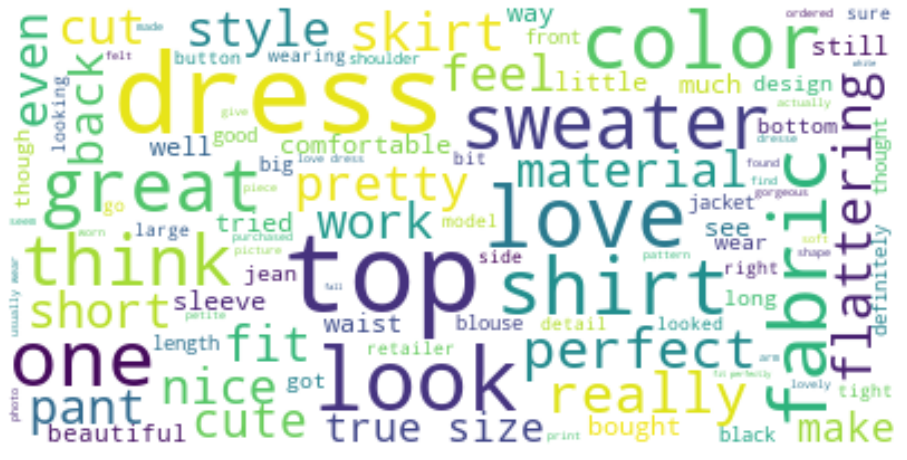

In [59]:
plt.rcParams['figure.figsize'] = (16, 16)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(filtered_sentence))


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 3.3. `Age` 시각화

<AxesSubplot:xlabel='Age', ylabel='Count'>

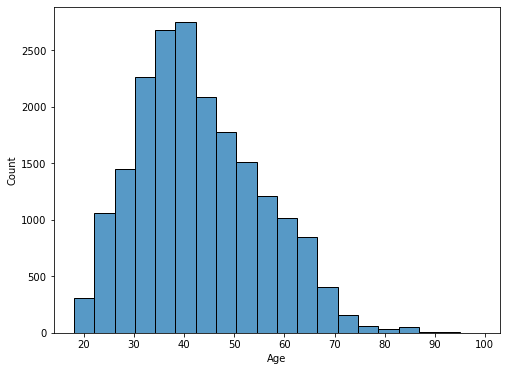

In [70]:
# 막대 그래프
plt.figure(figsize=(8,6))
sns.histplot(df_clean['Age'], bins=20)

### 3.4. `Recommended IND` 시각화

<AxesSubplot:>

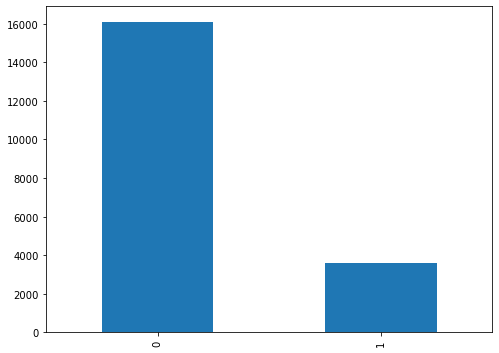

In [60]:
plt.figure(figsize=(8,6))

# 막대 그래프
df_clean['Recommended IND'].value_counts().plot(kind='bar')

## 4. 데이터 전 처리

상품 추천 여부 예측을 수행하기 위해서 주어진 이커머스 데이터에 대해서 분류 모델을 만들어보자

- 입력 데이터: `Review Text`  


- 입력 데이터 전처리
    1. 텍스트 데이터 자연어 전처리 - Tfidf 활용
    2. 학습 데이터와 테스트 데이터로 나누기

### 4.1. 자연어 전 처리 - Tfidf

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

# stop_words도 설정
vectorizer = TfidfVectorizer(stop_words = 'english')

# 소문자화 'Review Text' 데이터를 Tfidf로 변환
X = vectorizer.fit_transform(df_clean['Review Text'].str.lower())

In [101]:
X.shape

(19675, 13287)

In [102]:
# 예측 변수
y = df_clean['Recommended IND']
y = y.to_numpy().ravel() # 1 차원 벡터 형태로 출력하기 위해 ravel 사용

In [103]:
y

array([1, 0, 0, ..., 1, 0, 0])

In [84]:
vectorizer.get_feature_names()[-10:]

['yummysweater',
 'yup',
 'zing',
 'zip',
 'zipper',
 'zippered',
 'zippers',
 'zippery',
 'zoe',
 'zowie']

### 4.2. 학습, 테스트 데이터 분리

In [104]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 5. 머신러닝 모델 학습

### 5.1. 기본 분류 모델 학습 - 의사결정나무

In [105]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [106]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.8134688691232529


### 5.2. 다양한 분류 모델 학습

In [147]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


models = []
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('NB-M', MultinomialNB()))  # 멀티노미얼 나이브 베이즈
models.append(('NB-B', BernoulliNB()))  # 베르누이 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('XGB', XGBClassifier()))  # XGB 모델

for name, model in models:
    model.fit(x_train, y_train)
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

KNN - train_score : 0.882465, test score : 0.839644
NB-M - train_score : 0.832211, test score : 0.819568
NB-B - train_score : 0.908259, test score : 0.865565
RF - train_score : 1.000000, test score : 0.851080
SVM - train_score : 0.819314, test score : 0.814231
XGB - train_score : 0.950254, test score : 0.869886


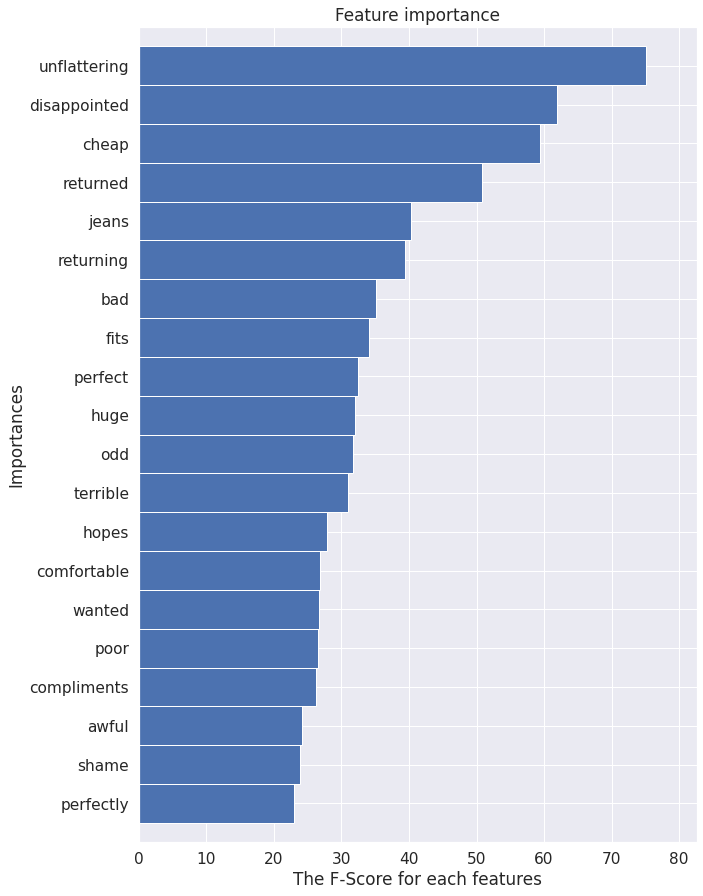

In [149]:
# xgb 모델에서 변수 중요도 출력

max_num_features = 20 # 상위 20개 변수 중요도
ax = xgb.plot_importance(models[-1][1], height = 1, grid = True, importance_type = 'gain', show_values = False, max_num_features = max_num_features)
ytick = ax.get_yticklabels()
word_importance = []
for i in range(max_num_features):
    word_importance.append(vectorizer.get_feature_names()[int(ytick[i].get_text().split('f')[1])])

ax.set_yticklabels(word_importance)

plt.rcParams['figure.figsize'] = (10, 15)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

## 6. 평가 및 예측

### 6.1. Confusion Matrix

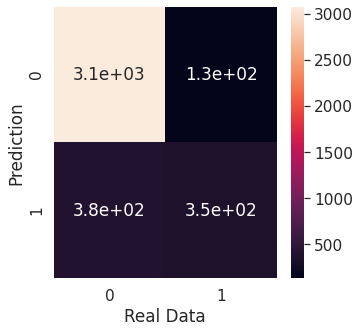

array([[3076,  128],
       [ 384,  347]])

In [126]:
from sklearn.metrics import confusion_matrix

# 의사결정나무 모델 예측값
model_predition = model.predict(x_test)

cm = confusion_matrix(y_test, model_predition)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(cm, annot=True)
plt.xlabel('Real Data')
plt.ylabel('Prediction')
plt.show()

cm

### 6.2. Precision & Recall

In [120]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Recall score: {}".format(recall_score(y_test, model_predition)))
print("Precision score: {}".format(precision_score(y_test, model_predition)))

Recall score: 0.4746922024623803
Precision score: 0.7305263157894737


---

test 데이터에서 **recall, precision** 지표의 성능이 별로 좋지 못했다.
모델에 변수를 추가하거나, 다른 모델을 사용해보는 등의 시도를 통해 성능을 높일 수 있는 방안을 모색하는 것이 좋겠다.